In [7]:
import yfinance as yf
import pandas as pd
import numpy as np

In [10]:
apple = yf.Ticker("AAPL")

In [11]:
apple = apple.history(period="max")

In [12]:
apple.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099192,0.099623,0.099192,0.099192,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094448,0.094448,0.094017,0.094017,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087548,0.087548,0.087117,0.087117,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089273,0.089704,0.089273,0.089273,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091861,0.092292,0.091861,0.091861,73449600,0.0,0.0


In [13]:
apple.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-03-11 00:00:00-04:00,172.940002,174.380005,172.050003,172.750000,60139500,0.0,0.0
2024-03-12 00:00:00-04:00,173.149994,174.029999,171.009995,173.229996,59825400,0.0,0.0
2024-03-13 00:00:00-04:00,172.770004,173.190002,170.759995,171.130005,52488700,0.0,0.0
2024-03-14 00:00:00-04:00,172.910004,174.309998,172.050003,173.000000,72913500,0.0,0.0
2024-03-15 00:00:00-04:00,171.169998,172.619995,170.289993,172.619995,121664700,0.0,0.0


In [14]:
apple.index

DatetimeIndex(['1980-12-12 00:00:00-05:00', '1980-12-15 00:00:00-05:00',
               '1980-12-16 00:00:00-05:00', '1980-12-17 00:00:00-05:00',
               '1980-12-18 00:00:00-05:00', '1980-12-19 00:00:00-05:00',
               '1980-12-22 00:00:00-05:00', '1980-12-23 00:00:00-05:00',
               '1980-12-24 00:00:00-05:00', '1980-12-26 00:00:00-05:00',
               ...
               '2024-03-04 00:00:00-05:00', '2024-03-05 00:00:00-05:00',
               '2024-03-06 00:00:00-05:00', '2024-03-07 00:00:00-05:00',
               '2024-03-08 00:00:00-05:00', '2024-03-11 00:00:00-04:00',
               '2024-03-12 00:00:00-04:00', '2024-03-13 00:00:00-04:00',
               '2024-03-14 00:00:00-04:00', '2024-03-15 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=10905, freq=None)

<Axes: xlabel='Date'>

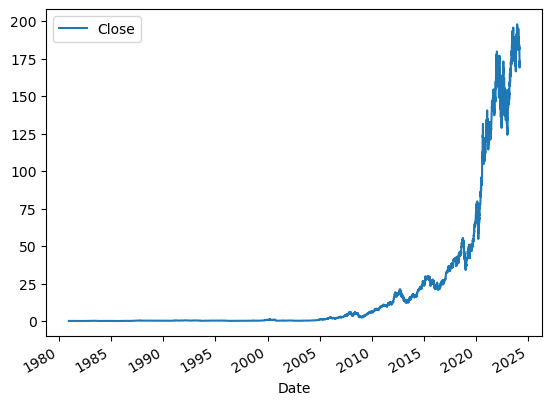

In [15]:
apple.plot.line(y="Close" , use_index=True)

In [17]:
del apple["Dividends"]
del apple["Stock Splits"]

In [18]:
apple["Tomorrow"]= apple["Close"].shift(-1) # create a column that is one step ahead of the closing price. 

In [19]:
apple.head()

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1980-12-12 00:00:00-05:00,0.099192,0.099623,0.099192,0.099192,469033600,0.094017
1980-12-15 00:00:00-05:00,0.094448,0.094448,0.094017,0.094017,175884800,0.087117
1980-12-16 00:00:00-05:00,0.087548,0.087548,0.087117,0.087117,105728000,0.089273
1980-12-17 00:00:00-05:00,0.089273,0.089704,0.089273,0.089273,86441600,0.091861
1980-12-18 00:00:00-05:00,0.091861,0.092292,0.091861,0.091861,73449600,0.097467


In [22]:
apple["Target"] = (apple["Tomorrow"]>apple["Close"]).astype(int) # generate a dummy that equals 1 if price increased from day before
#and zero otherwise. 

In [23]:
apple.head()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099192,0.099623,0.099192,0.099192,469033600,0.094017,0
1980-12-15 00:00:00-05:00,0.094448,0.094448,0.094017,0.094017,175884800,0.087117,0
1980-12-16 00:00:00-05:00,0.087548,0.087548,0.087117,0.087117,105728000,0.089273,1
1980-12-17 00:00:00-05:00,0.089273,0.089704,0.089273,0.089273,86441600,0.091861,1
1980-12-18 00:00:00-05:00,0.091861,0.092292,0.091861,0.091861,73449600,0.097467,1


In [24]:
apple = apple.loc["1990-01-01":].copy() # keep observations after year 1990. 

In [25]:
apple.head()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,0.248953,0.264843,0.247187,0.263078,183198400,0.264843,1
1990-01-03 00:00:00-05:00,0.268375,0.268375,0.264843,0.264843,207995200,0.265727,1
1990-01-04 00:00:00-05:00,0.270141,0.273672,0.263078,0.265727,221513600,0.266610,1
1990-01-05 00:00:00-05:00,0.266610,0.270141,0.261312,0.266610,123312000,0.268375,1
1990-01-08 00:00:00-05:00,0.264843,0.268375,0.261312,0.268375,101572800,0.265727,0


In [27]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=120, min_samples_split=120, random_state=1) # using a random forest model. n_estimators is the number of 
#individual decision trees you want to train. min_sample split protects against overfitting. the higher the value the less the accuracy but less overfit
# random_states is we run the model twice we get the same results. (like set seed in Stata).  
train = apple.iloc[:-120] # train data except the last 102. 
test = apple.iloc[-120:] # test data last 120 observations 
predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])


RandomForestClassifier(min_samples_split=100, random_state=1)

In [28]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds= pd.Series(preds, index=test.index)

In [30]:
precision_score(test["Target"], preds)

0.4888888888888889

In [32]:
combined = pd.concat([test["Target"], preds], axis=1)

<Axes: xlabel='Date'>

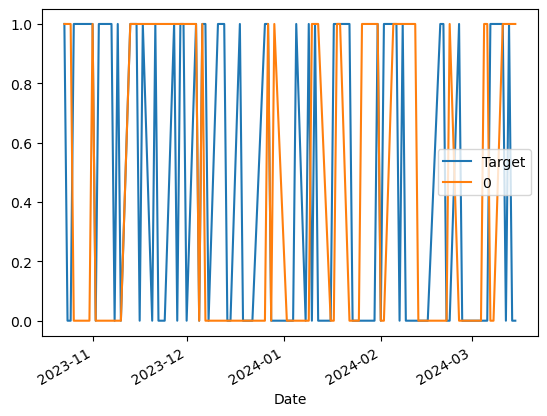

In [33]:
combined.plot()

In [ ]:
#The predictive power of this model is not adequate. It only has an 49% precision rate. In the following code, I will try to improve the accuracy. 

In [63]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name= "Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [64]:
def backtest(data, model, predictors, start=2500, step=250):  # there are 250 trading days per year. 
    #We are testing by year steps and using the first 10 years as a starting point. ie. backtest year 11 on the 10 years prior, year 12 on the 11 years
    # prior etc. 
    all_predictions = []
   
    for i in range(start, data.shape[0], step): #the data.shape[0] is the number of rows in dataset. 
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)
    

In [65]:
predictions = backtest(apple, model, predictors)

In [66]:
predictions["Predictions"].value_counts()

Predictions
0    4170
1    1947
Name: count, dtype: int64

In [67]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5125834617360041

In [69]:
predictions["Target"].value_counts()/predictions.shape[0]

Target
1    0.520353
0    0.479647
Name: count, dtype: float64

In [71]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons: 
    rolling_averages = apple.rolling(horizon).mean()
    ratio_column = f"Close_Ratio_{horizon}"
    apple[ratio_column] = apple["Close"]/rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    apple[trend_column] = apple.shift(1).rolling(horizon).sum()["Target"]

    new_predictors += [ratio_column, trend_column]
    
    

In [73]:
apple.head(10)

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,0.248953,0.264843,0.247187,0.263078,183198400,0.264843,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,0.268375,0.268375,0.264843,0.264843,207995200,0.265727,1,1.003344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,0.270141,0.273672,0.263078,0.265727,221513600,0.266610,1,1.001665,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,0.266610,0.270141,0.261312,0.266610,123312000,0.268375,1,1.001659,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,0.264843,0.268375,0.261312,0.268375,101572800,0.265727,0,1.003300,2.0,1.009967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-09 00:00:00-05:00,0.268375,0.268375,0.261312,0.265727,86139200,0.254250,0,0.995041,1.0,0.998011,4.0,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-10 00:00:00-05:00,0.265727,0.265727,0.252484,0.254250,199718400,0.243656,0,0.977929,0.0,0.962567,3.0,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-11 00:00:00-05:00,0.256016,0.256016,0.243656,0.243656,211052800,0.243656,0,0.978723,0.0,0.938137,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-12 00:00:00-05:00,0.241891,0.245422,0.238359,0.243656,171897600,0.241891,0,1.000000,0.0,0.955017,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
apple = apple.dropna()

In [75]:
apple

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,0.215567,0.219251,0.213724,0.214645,293664000,0.219251,1,0.993604,1.0,0.978993,1.0,1.007241,22.0,0.694753,111.0,0.637248,462.0
1993-12-15 00:00:00-05:00,0.213724,0.219251,0.213724,0.219251,123883200,0.216488,0,1.010615,1.0,1.014492,2.0,1.025699,23.0,0.711547,111.0,0.651010,462.0
1993-12-16 00:00:00-05:00,0.217409,0.219251,0.213724,0.216488,126369600,0.217409,1,0.993658,1.0,1.005994,2.0,1.010468,22.0,0.704569,110.0,0.642898,461.0
1993-12-17 00:00:00-05:00,0.217409,0.219251,0.214645,0.217409,145152000,0.210039,0,1.002123,1.0,1.001698,3.0,1.011960,23.0,0.709636,110.0,0.645728,461.0
1993-12-20 00:00:00-05:00,0.215567,0.219251,0.208196,0.210039,189033600,0.202669,0,0.982758,1.0,0.974358,2.0,0.975653,22.0,0.687599,110.0,0.623946,460.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-08 00:00:00-05:00,169.000000,173.699997,168.940002,170.729996,76114600,172.750000,1,1.005092,1.0,0.999508,1.0,0.914759,22.0,0.950643,128.0,1.178999,520.0
2024-03-11 00:00:00-04:00,172.940002,174.380005,172.050003,172.750000,60139500,173.229996,1,1.005881,2.0,1.014124,2.0,0.927380,22.0,0.961397,128.0,1.192018,521.0
2024-03-12 00:00:00-04:00,173.149994,174.029999,171.009995,173.229996,59825400,171.130005,0,1.001387,2.0,1.013242,3.0,0.931998,22.0,0.963608,128.0,1.194363,522.0


In [78]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors]) [:,1]
    preds[preds >= 0.6] = 1
    preds[preds< 0.6] = 0
    preds = pd.Series(preds, index=test.index, name= "Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [80]:
predictions= backtest(apple, model, new_predictors)

In [83]:
predictions["Predictions"].value_counts() 

Predictions
0.0    4577
1.0     539
Name: count, dtype: int64

In [87]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5306122448979592

In [ ]:
# The results of this analysis yields a precision score of 53.06%. This is an imporvement over the previous attempt.